<a href="https://colab.research.google.com/github/donkeyson/Digital-Humanities/blob/main/(%EC%86%90%EB%8F%99%ED%9D%AC)_%EB%94%94%EC%B2%A0%ED%81%90%EA%B8%B0%EB%A7%90%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

목표


1. 『소유냐존재냐』 분석을 통해 에리히 프롬의 저술 방식 분석
2.  텍스트의 저술 패턴을 분석하고 단어 출현 빈도 분석을 통해 글의 핵심을 파악하기
3. 프롬의 저술 패턴 분석을 통해 간접적으로 저술의 의도를 추정

세부 목표






1.   각 장을 문장, 형태소 별로 분리
2.   형태소 중 각 장에서 가장 많이 사용된 핵심어를 추출
3. 핵심어가 사용된 문장의 위치를 추출하고 장 별로 출현 위치의 유사성과 규칙성을 분석
4. 분석 자료를 토대로 프롬의 텍스트에서 글의 의도와 핵심을 추측





In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 43.3 MB/s 
     |████████████████████████████████| 86 kB 5.3 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import pandas as pd

초기작업


*   작업의 편의성을 위해 폰트와 형태소 분석기를 설치하고 시작
*   데이터 처리 과정에서 자주 사용하게 될 pandas를 import





In [ ]:
chap_sections = [] #각 장들을 저장할 리스트
for i in range(1, 10):
  with open(f"/content/drive/MyDrive/Colab Notebooks/2021-2 디지털기반철학큐레이팅/data/havebe/chap{i}sections.txt", "r") as f:
    chap_split = [line.strip() for line in f]
    chap_sections.append(chap_split)
chap_sections_one = [] #챕터들을 한 문장으로 변환해서 저장할 리스트
for i in range(9):
  chap_sections_one.append("".join(chap_sections[i]))

분석할 텍스트 불러오기

*   9개의 장을 모두 불러오기
*   나눠진 챕터를 한 줄로 바꿔서 저장



In [ ]:
sentences = [] #문장들을 저장할 리스트
for i in range(9):
  sentences.append(chap_sections_one[i].split('.'))

마침표를 기준으로 각 챕터의 문장들을 분할해서 이중 리스트로 저장

In [ ]:
from konlpy.tag import Okt
okt = Okt()

형태소 분석을 위해 Okt import

In [ ]:
nouns = [] #명사들을 저장할 리스트

for i in chap_sections_one:
  nouns.append(okt.nouns(i))  

명사 추출


*   Okt를 이용해 각장의 명사들을 추출해서 리스트에 저장
*   하나의 장을 한 문자열로 저장한 리스트를 활용



In [ ]:
df = pd.DataFrame(nouns[0], columns=['nouns'])
df['Chapter'] = 1


for i in range(len(nouns)-1):
  df_a = pd.DataFrame(nouns[i+1], columns=['nouns'])
  df_a['Chapter'] = i+2
  df = df.merge(df_a, how = 'outer')

df

,nouns,Chapter
0,소유,1
1,소유,1
2,소유,1
3,소유,1
4,소유,1
...,...,...
39558,르네상스,9
39559,빚,9
39560,발달,9
39561,유인,9


pandas으로 데이터 프레임 만들기


*   9개의 챕터의 명사들을 통합해서 데이터 프레임으로 만들기
*   챕터 column으로 각 챕터의 단어를 구별



In [ ]:
df["nouns"].value_counts()

것       1009
그        715
이        498
수        488
인간       424
        ... 
힉습자료       1
두드         1
종대         1
교섭         1
유석         1
Name: nouns, Length: 7258, dtype: int64

단어의 빈도 수 측정


*   value_counts()를 통해 확인 결과 의미없는 의존명사의 빈도수가 높게 측정됐다.
*   원활한 데이터 분석을 위해 상위 4개의 대명사와 의존명사를 삭제하기로 했다.



In [ ]:
index1 = df[df['nouns'] == '것'].index
index2 = df[df['nouns'] == '그'].index
index3 = df[df['nouns'] == '이'].index
index4 = df[df['nouns'] == '수'].index
            
df.drop(index1, inplace=True)
df.drop(index2, inplace=True)
df.drop(index3, inplace=True)
df.drop(index4, inplace=True)

df['nouns'].value_counts()

인간    424
우리    386
소유    372
사회    307
옵     245
     ... 
종대      1
교섭      1
문호      1
잠수      1
유석      1
Name: nouns, Length: 7254, dtype: int64

데이터 정제 결과 가장 많이 출현한 명사는 인간, 우리, 소유, 사회였다.

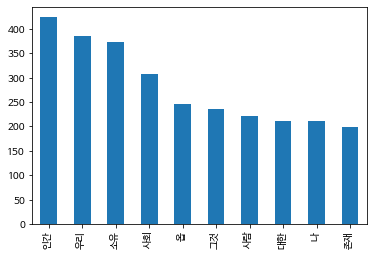

In [ ]:
df["nouns"].value_counts()[:10].plot(kind='bar')

위의 데이터를 차트로 나타낸 결과이다. '옵', '그것', '대한' 등 아직 정제해야할 데이터가 더 보인다.

In [ ]:
index1 = df[df['nouns'] == '옵'].index
index2 = df[df['nouns'] == '그것'].index
index3 = df[df['nouns'] == '대한'].index
index4 = df[df['nouns'] == '말'].index
index5 = df[df['nouns'] == '가지'].index
index6 = df[df['nouns'] == '의'].index
index7 = df[df['nouns'] == '둘'].index
index8 = df[df['nouns'] == '윤'].index

            
df.drop(index1, inplace=True)
df.drop(index2, inplace=True)
df.drop(index3, inplace=True)
df.drop(index4, inplace=True)
df.drop(index5, inplace=True)
df.drop(index6, inplace=True)
df.drop(index7, inplace=True)
df.drop(index8, inplace=True)

상위 10개의 단어가 의미 있는 단어로 채워지게 수정 작업을 했다.

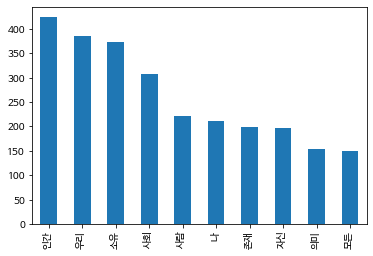

In [ ]:
df['nouns'].value_counts()[:10].plot(kind='bar')

『소유냐존재냐』형태소 분석의 의미


*   출현한 단어의 빈도를 통해 『소유냐존재냐』의 핵심 키워드를 파악할 수 있다.
*   흥미로운 점은 '소유'와 '존재'보다 '인간'과 '우리'가 많이 사용되었다는 점과 '소유'가 존재보다 더 많이 사용되었다는 점이다.
*   또한, 인간과 우리라는 표현이 많이 사용됬다는 점은 세 가지 정도의 시사점을 드러낸다.


    1.   '인간'이라는 명사가 많이 출현했다는 점은 이 책을 모르는 사람이 봐도 이 책을 인문학으로 추론할 수 있는 근거이다. 
    2.   즉 '인간'이라는 단어의 사용 빈도는 서적의 장르를 규정할 수 있는 근거 중 하나이다.
    3.   '우리'라는 단어가 많이 출현했다는 점은 프롬이 공동체 의식에 대해 말하고 있을 가능성을 시사한다.

In [ ]:
index1 = df[df['nouns'] == '공동체'].index
print(index1)

Int64Index([ 9429,  9430,  9431,  9432,  9433, 18276, 18277, 31535, 31536,
            31537, 37454, 37455, 37456, 37457],
           dtype='int64')


실제로 『소유냐존재냐』에는 '**공동체**'가 수차례 등장하고 있다.
추후에 핵심 키워드들이 문장에서 사용되는 방식을 분석하고 **'공동체'와 키워드의 관계**를 추적할 것이다.

In [ ]:
df_s = pd.DataFrame(sentences[0], columns=['sentences']) #챕터1의 문장들을 저장하는 데이터 프레임
df_s['Chapter'] = 1 #들어간 문장들의 챕터 값을 1로 입력


for i in range(len(sentences)-1): #챕터 2부터 9까지 같은 방식으로 합치기
  df_b = pd.DataFrame(sentences[i+1], columns=['sentences'])
  df_b['Chapter'] = i+2
  df_s = df_s.merge(df_b, how = 'outer')

문장으로 나눈 리스트도 데이터 프레임으로 만들어 준다.

In [ ]:
df_s.reset_index(inplace = True)
df_s

,index,sentences,Chapter
0,0,소유와 존재의 차이의 중요성 일반적인 상식으로는 소유나 존재냐의 양자백인이 있음 수 없다,1
1,1,우리의 눈에는 소유한다는 것이 삶에 포함된 극히 정상적인 행위이다,1
2,2,살기 위해서 우리는 시몽운· 당연히 소유한다,1
3,3,"그뿐이뱌 사-뭉음 줍기기 위해서도 그것을 소유하지 않으면 안 된다, 소유하는 것을...",1
4,4,아무것도 소유하지 못한 사람은 아무것도 아닌 존재로 여겨지는 실정이다,1
...,...,...,...
4089,4089,"e)과 반UX,antithesis, Antithese이) 라면 새로운 합(合",9
4090,4090,synthesis,9
4091,4091,Synthese)-즉 중세 후기의 종교적 핵심과 르네상스 이후의 과학적 사고 빚개...,9
4092,4092,이 합이 바로 존재의 도시이다,9


In [ ]:
df_s['keyword'] = 'x' #키워드 컬럼의 값을 x로 초기화
contains_human = df_s['sentences'].str.contains('인간') #문장에 '인간'이 포함된 경우
contains_we = df_s['sentences'].str.contains('우리') #문장에 '우리'가 포함된 경우
contains_have = df_s['sentences'].str.contains('소유') #문장에 '소유'가 포함된 경우
contains_social = df_s['sentences'].str.contains('사회') #문장에 '사회'가 포함된 경우

keyword_is_x = df_s['keyword'] == 'x' #keyword의 값이 'x'인 경우

In [ ]:
df_s.loc[(keyword_is_x) & (contains_human), 'keyword'] = '인간'

In [ ]:
df_s.loc[(df_s['keyword'] != '인간') & (contains_we), 'keyword'] = '우리'

In [ ]:
df_s.loc[((df_s['keyword'] != '우리')|(df_s['keyword'] != '우리')) & (contains_have), 'keyword'] = '소유'

In [ ]:
df_s.loc[((df_s['keyword'] != '인간')|(df_s['keyword'] != '우리')|(df_s['keyword'] != '소유')) & (contains_social), 'keyword'] = '사회'

In [ ]:
df_s

,index,sentences,Chapter,keyword
0,0,소유와 존재의 차이의 중요성 일반적인 상식으로는 소유나 존재냐의 양자백인이 있음 수 없다,1,소유
1,1,우리의 눈에는 소유한다는 것이 삶에 포함된 극히 정상적인 행위이다,1,우리
2,2,살기 위해서 우리는 시몽운· 당연히 소유한다,1,우리
3,3,"그뿐이뱌 사-뭉음 줍기기 위해서도 그것을 소유하지 않으면 안 된다, 소유하는 것을...",1,사회
4,4,아무것도 소유하지 못한 사람은 아무것도 아닌 존재로 여겨지는 실정이다,1,소유
...,...,...,...,...
4089,4089,"e)과 반UX,antithesis, Antithese이) 라면 새로운 합(合",9,x
4090,4090,synthesis,9,x
4091,4091,Synthese)-즉 중세 후기의 종교적 핵심과 르네상스 이후의 과학적 사고 빚개...,9,x
4092,4092,이 합이 바로 존재의 도시이다,9,x


핵심 키워드를 포함하는 문장들을 필터링하고 해당하는 단어의 표시를 남겼다. 만약에 문장이 '소유'를 포함하면, keyword에 '소유'를 입력한다.

In [ ]:
df_s['keyword'] = 'x'
for i in range(len(df_s.index)-1):
  if '인간' in df_s['sentences'][i]:
    df_s['keyword'][i] = '인간'
  elif '우리' in df_s['sentences'][i]:
    df_s['keyword'][i] = '우리'
  elif '소유' in df_s['sentences'][i]:
    df_s['keyword'][i] = '소유'
  elif '사회' in df_s['sentences'][i]:
    df_s['keyword'][i] = '사회'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: Sett

필터링이 작동이 안되는 경우가 있어서 for문도 함께 작성했다. 

In [ ]:
df_s

,index,sentences,Chapter,keyword
0,0,소유와 존재의 차이의 중요성 일반적인 상식으로는 소유나 존재냐의 양자백인이 있음 수 없다,1,소유
1,1,우리의 눈에는 소유한다는 것이 삶에 포함된 극히 정상적인 행위이다,1,우리
2,2,살기 위해서 우리는 시몽운· 당연히 소유한다,1,우리
3,3,"그뿐이뱌 사-뭉음 줍기기 위해서도 그것을 소유하지 않으면 안 된다, 소유하는 것을...",1,소유
4,4,아무것도 소유하지 못한 사람은 아무것도 아닌 존재로 여겨지는 실정이다,1,소유
...,...,...,...,...
4089,4089,"e)과 반UX,antithesis, Antithese이) 라면 새로운 합(合",9,x
4090,4090,synthesis,9,x
4091,4091,Synthese)-즉 중세 후기의 종교적 핵심과 르네상스 이후의 과학적 사고 빚개...,9,x
4092,4092,이 합이 바로 존재의 도시이다,9,x


df 출력결과 정상적으로 keyword가 저장되었지만, 한 문장에 두가지 키워드가 들어간 경우도 있어서 secondkey를 새로운 column으로 지정했다.

In [ ]:
df_s['secondkey'] = 'x'
keyword_human = df_s['keyword'].str.contains('인간')
keyword_we = df_s['keyword'].str.contains('우리')
keyword_have = df_s['keyword'].str.contains('소유')
keyword_social = df_s['keyword'].str.contains('사회')

keyword_x = df_s['keyword'] != 'x'

#키워드가 인간인 것들중 우리, 소유, 사회도 포함한 문장 필터링
df_s.loc[(keyword_x) & (keyword_human) & (contains_we), 'secondkey'] = '우리'
df_s.loc[(keyword_x) & (keyword_human) & (contains_have), 'secondkey'] = '소유'
df_s.loc[(keyword_x) & (keyword_human) & (contains_social), 'secondkey'] = '사회'

#키워드가 우리인 것들중 인간, 소유, 사회도 포함한 문장 필터링
df_s.loc[(keyword_x) & (keyword_we) & (contains_human), 'secondkey'] = '인간'
df_s.loc[(keyword_x) & (keyword_we) & (contains_have), 'secondkey'] = '소유'
df_s.loc[(keyword_x) & (keyword_we) & (contains_social), 'secondkey'] = '사회'

#키워드가 사회인 것들중 인간, 우리, 소유도 포함한 문장 필터링
df_s.loc[(keyword_x) & (keyword_social) & (contains_human), 'secondkey'] = '인간'
df_s.loc[(keyword_x) & (keyword_social) & (contains_we), 'secondkey'] = '우리'
df_s.loc[(keyword_x) & (keyword_social) & (contains_have), 'secondkey'] = '소유'

두번째 키를 포함한 경우를 필터링 해서 secondkey에 저장했다.

In [ ]:
df_s

,index,sentences,Chapter,keyword,secondkey
0,0,소유와 존재의 차이의 중요성 일반적인 상식으로는 소유나 존재냐의 양자백인이 있음 수 없다,1,소유,x
1,1,우리의 눈에는 소유한다는 것이 삶에 포함된 극히 정상적인 행위이다,1,우리,소유
2,2,살기 위해서 우리는 시몽운· 당연히 소유한다,1,우리,소유
3,3,"그뿐이뱌 사-뭉음 줍기기 위해서도 그것을 소유하지 않으면 안 된다, 소유하는 것을...",1,소유,x
4,4,아무것도 소유하지 못한 사람은 아무것도 아닌 존재로 여겨지는 실정이다,1,소유,x
...,...,...,...,...,...
4089,4089,"e)과 반UX,antithesis, Antithese이) 라면 새로운 합(合",9,x,x
4090,4090,synthesis,9,x,x
4091,4091,Synthese)-즉 중세 후기의 종교적 핵심과 르네상스 이후의 과학적 사고 빚개...,9,x,x
4092,4092,이 합이 바로 존재의 도시이다,9,x,x


In [ ]:
df_s['secondkey'] = 'x'
for i in range(len(df_s.index)-1):
  if df_s['keyword'][i] == '소유':
    if '인간' in df_s['sentences'][i]:
      df_s['secondkey'][i] = '인간'
    elif '우리' in df_s['sentences'][i]:
      df_s['secondkey'][i] = '우리'
    elif '사회' in df_s['sentences'][i]:
      df_s['secondkey'][i] = '사회'
  elif df_s['keyword'][i] == '우리':
    if '인간' in df_s['sentences'][i]:
      df_s['secondkey'][i] = '인간'
    elif '소유' in df_s['sentences'][i]:
      df_s['secondkey'][i] = '소유'
    elif '사회' in df_s['sentences'][i]:
      df_s['secondkey'][i] = '사회'
  elif df_s['keyword'][i] == '사회':
    if '인간' in df_s['sentences'][i]:
      df_s['secondkey'][i] = '인간'
    elif '소유' in df_s['sentences'][i]:
      df_s['secondkey'][i] = '소유'
    elif '우리' in df_s['sentences'][i]:
      df_s['secondkey'][i] = '우리'
  elif df_s['keyword'][i] == '인간':
    if '사회' in df_s['sentences'][i]:
      df_s['secondkey'][i] = '사회'
    elif '소유' in df_s['sentences'][i]:
      df_s['secondkey'][i] = '소유'
    elif '우리' in df_s['sentences'][i]:
      df_s['secondkey'][i] = '우리'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is try

마찬가지로 코드가 필터링을 잘 수행하지 못하는 경우가 있어서 for문도 함께 작성했다.

In [ ]:
df_s

,index,sentences,Chapter,keyword,secondkey
0,0,소유와 존재의 차이의 중요성 일반적인 상식으로는 소유나 존재냐의 양자백인이 있음 수 없다,1,소유,x
1,1,우리의 눈에는 소유한다는 것이 삶에 포함된 극히 정상적인 행위이다,1,우리,소유
2,2,살기 위해서 우리는 시몽운· 당연히 소유한다,1,우리,소유
3,3,"그뿐이뱌 사-뭉음 줍기기 위해서도 그것을 소유하지 않으면 안 된다, 소유하는 것을...",1,사회,소유
4,4,아무것도 소유하지 못한 사람은 아무것도 아닌 존재로 여겨지는 실정이다,1,소유,x
...,...,...,...,...,...
4089,4089,"e)과 반UX,antithesis, Antithese이) 라면 새로운 합(合",9,x,x
4090,4090,synthesis,9,x,x
4091,4091,Synthese)-즉 중세 후기의 종교적 핵심과 르네상스 이후의 과학적 사고 빚개...,9,x,x
4092,4092,이 합이 바로 존재의 도시이다,9,x,x


df_s에 정상적으로 두번째 키워드가 저장된 것을 볼 수 있다. 이제 secondkey가 있는 문장들을 중심으로 키워드 간의 연관성을 측정할 수 있게 되었다.

In [ ]:
index1 = df_s[df_s['secondkey'] != 'x'].index
print(index1)

Int64Index([   1,    2,    3,   10,   14,   77,   84,   86,   92,  101,
            ...
            4002, 4023, 4026, 4030, 4032, 4051, 4066, 4074, 4079, 4085],
           dtype='int64', length=184)


측정결과 secondkey가 등장하는 경우는 총 184개 정도다.

In [ ]:
index1 = df_s[df_s['keyword'] != 'x'].index
print(index1)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    9,   10,   12,
            ...
            4056, 4066, 4067, 4074, 4077, 4079, 4083, 4084, 4085, 4087],
           dtype='int64', length=1151)


keyword가 등장한 문장의 개수는 1151개다.

In [ ]:
df_s['iskeyword'] = 0
df_s.loc[(df_s['keyword'] != 'x') & (df_s['secondkey'] != 'x'), 'iskeyword'] = 2
df_s.loc[(df_s['keyword'] != 'x') & (df_s['secondkey'] == 'x'), 'iskeyword'] = 1

핵심 키워드가 1개인 경우가 2개인 경우를 구분해서 수치화 했다.

In [ ]:
for i in range(len(df_s.index)-1):
  if (df_s['keyword'][i] != 'x') & (df_s['secondkey'][i] != 'x'):
    df_s['iskeyword'][i] = 2
  elif (df_s['keyword'][i] != 'x') & (df_s['secondkey'][i] == 'x'):
    df_s['iskeyword'][i] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


만약의 경우를 대비해 for문도 작성했다.

In [ ]:
df_s

,index,sentences,Chapter,keyword,secondkey,iskeyword
0,0,소유와 존재의 차이의 중요성 일반적인 상식으로는 소유나 존재냐의 양자백인이 있음 수 없다,1,소유,x,1
1,1,우리의 눈에는 소유한다는 것이 삶에 포함된 극히 정상적인 행위이다,1,우리,소유,2
2,2,살기 위해서 우리는 시몽운· 당연히 소유한다,1,우리,소유,2
3,3,"그뿐이뱌 사-뭉음 줍기기 위해서도 그것을 소유하지 않으면 안 된다, 소유하는 것을...",1,사회,소유,2
4,4,아무것도 소유하지 못한 사람은 아무것도 아닌 존재로 여겨지는 실정이다,1,소유,x,1
...,...,...,...,...,...,...
4089,4089,"e)과 반UX,antithesis, Antithese이) 라면 새로운 합(合",9,x,x,0
4090,4090,synthesis,9,x,x,0
4091,4091,Synthese)-즉 중세 후기의 종교적 핵심과 르네상스 이후의 과학적 사고 빚개...,9,x,x,0
4092,4092,이 합이 바로 존재의 도시이다,9,x,x,0


iskeyword가 잘 적용된 모습이다.

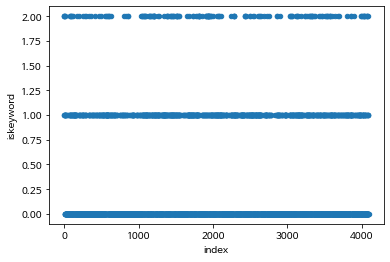

In [ ]:
df_s.plot(kind='scatter',x ='index', y = "iskeyword")

책에서 keyword가 등장한 위치를 분석하기 위해 차트를 만들었지만, 생각보다 그래프가 작게 나왔다.

In [ ]:
import matplotlib.pyplot as plot
plt.rcParams['figure.figsize'] = [100, 5]

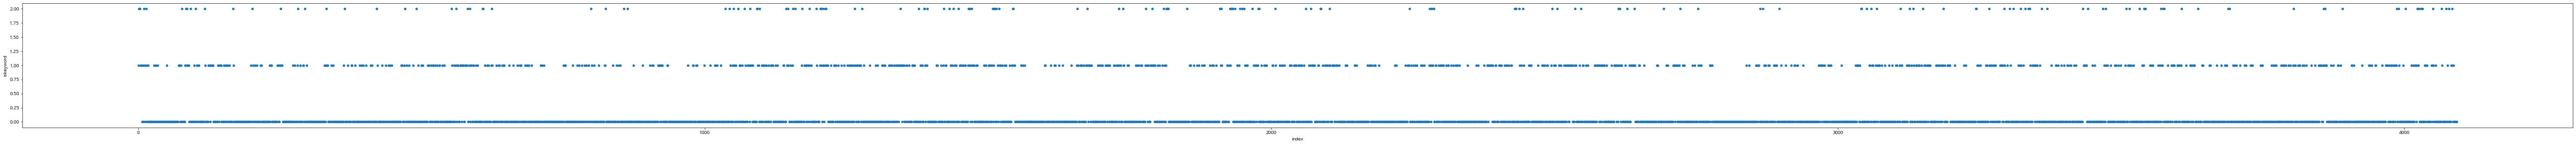

In [ ]:
df_s.plot(kind='scatter',x ='index', y = "iskeyword")

전체 데이터의 경우 x축을 100까지 늘려야 겨우 구분이 가능했다. 챕터별로 구분해서 분석하기로 했다.

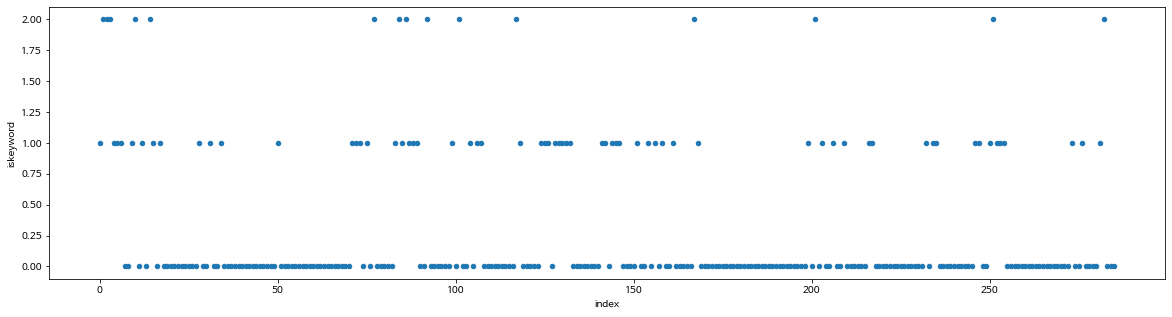

In [ ]:
plt.rcParams['figure.figsize'] = [20, 5]
df_s[df_s['Chapter'] == 1].plot(kind='scatter',x ='index', y = "iskeyword")

유의미한 분석을 위해 챕터 별로 나누어 분석을 진행했다. 

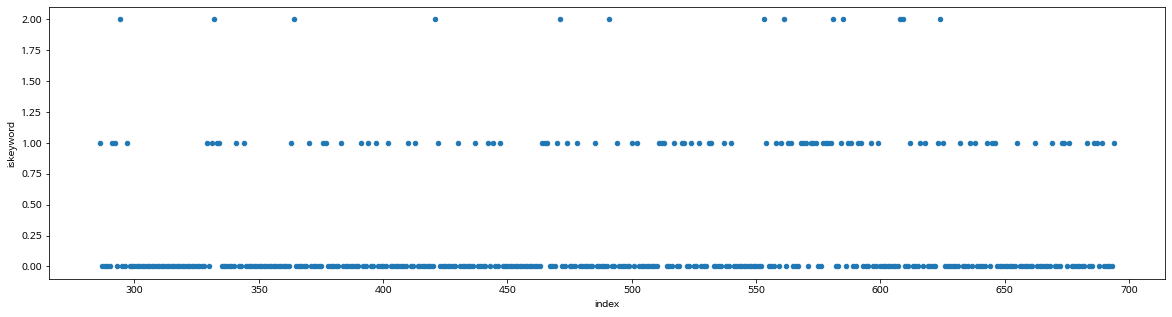

In [ ]:
plt.rcParams['figure.figsize'] = [20, 5]
df_s[df_s['Chapter'] == 2].plot(kind='scatter',x ='index', y = "iskeyword")

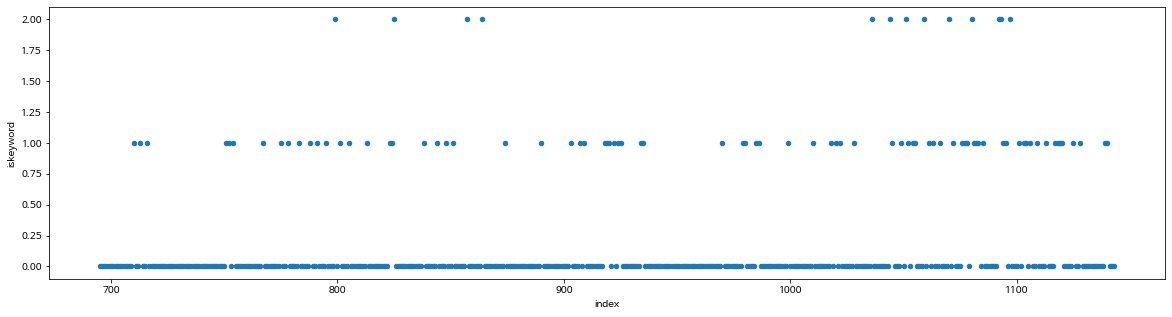

In [ ]:
plt.rcParams['figure.figsize'] = [20, 5]
df_s[df_s['Chapter'] == 3].plot(kind='scatter',x ='index', y = "iskeyword")

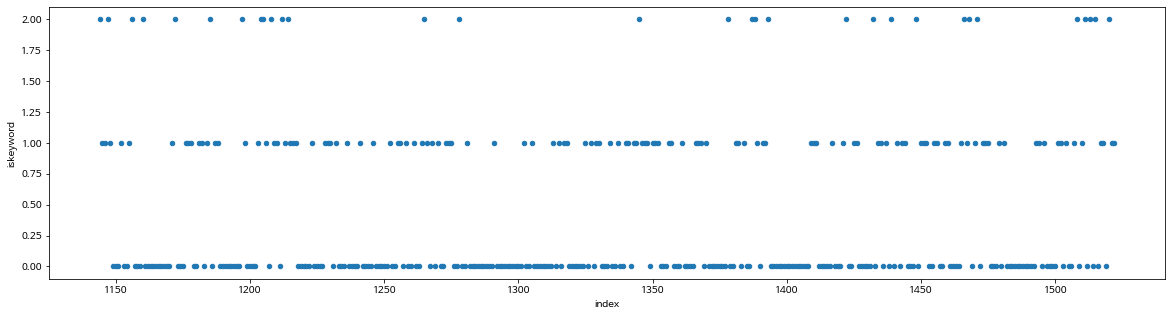

In [ ]:
plt.rcParams['figure.figsize'] = [20, 5]
df_s[df_s['Chapter'] == 4].plot(kind='scatter',x ='index', y = "iskeyword")

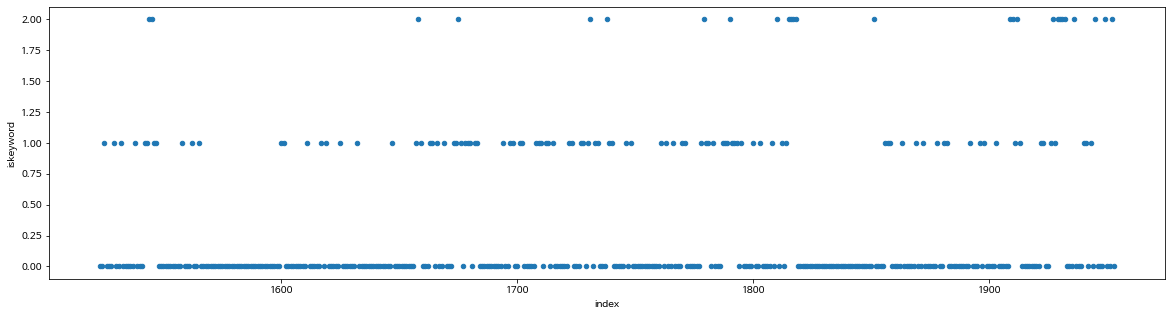

In [ ]:
plt.rcParams['figure.figsize'] = [20, 5]
df_s[df_s['Chapter'] == 5].plot(kind='scatter',x ='index', y = "iskeyword")

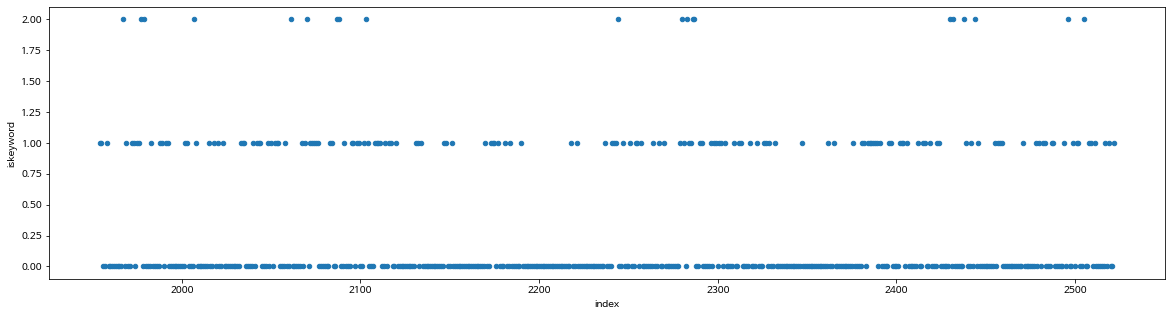

In [ ]:
plt.rcParams['figure.figsize'] = [20, 5]
df_s[df_s['Chapter'] == 6].plot(kind='scatter',x ='index', y = "iskeyword")

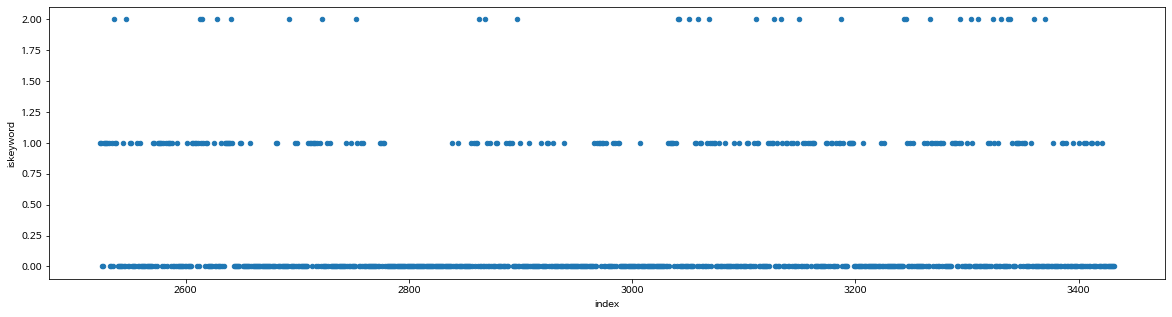

In [ ]:
plt.rcParams['figure.figsize'] = [20, 5]
df_s[df_s['Chapter'] == 7].plot(kind='scatter',x ='index', y = "iskeyword")

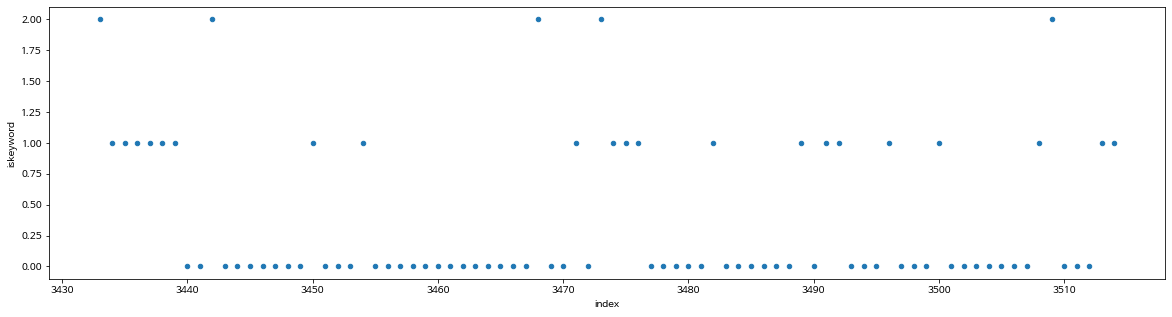

In [ ]:
plt.rcParams['figure.figsize'] = [20, 5]
df_s[df_s['Chapter'] == 8].plot(kind='scatter',x ='index', y = "iskeyword")

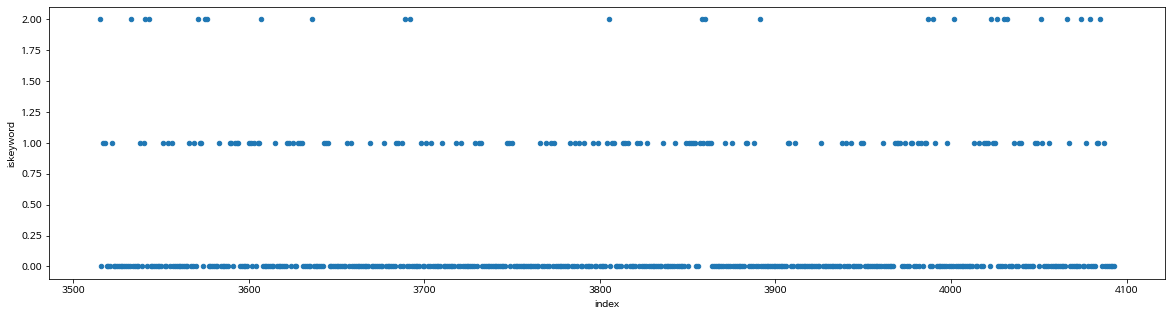

In [ ]:
plt.rcParams['figure.figsize'] = [20, 5]
df_s[df_s['Chapter'] == 9].plot(kind='scatter',x ='index', y = "iskeyword")

분석결과가 시사하는 바는 다음과 같다.


1.   대체로 중반보다는 **초반과 후반**에 키워드가 등장했다.
2.   **8장은 키워드의 수가 압도적으로 적었다**. 즉 8장은 전체 글의 흐름과 다른 얘기를 하고 있을 가능성이 높다.

다만 챕터 단위의 핵심 키워드의 위치 분석을 통해서 프롬의 **저술 스타일에 대한 유의미한 분석은 불가능**했다. 

더 유의미한 분석을 위해 챕터별로 핵심 키워드가 등장한 빈도수를 점검하기로 했다.



In [ ]:
for i in range(9):
  a = df_s[(df_s['iskeyword'] == True) & (df_s['Chapter'] == i+1)].count()
  print(a)

index        63
sentences    63
Chapter      63
keyword      63
secondkey    63
iskeyword    63
dtype: int64
index        93
sentences    93
Chapter      93
keyword      93
secondkey    93
iskeyword    93
dtype: int64
index        78
sentences    78
Chapter      78
keyword      78
secondkey    78
iskeyword    78
dtype: int64
index        120
sentences    120
Chapter      120
keyword      120
secondkey    120
iskeyword    120
dtype: int64
index        98
sentences    98
Chapter      98
keyword      98
secondkey    98
iskeyword    98
dtype: int64
index        155
sentences    155
Chapter      155
keyword      155
secondkey    155
iskeyword    155
dtype: int64
index        209
sentences    209
Chapter      209
keyword      209
secondkey    209
iskeyword    209
dtype: int64
index        21
sentences    21
Chapter      21
keyword      21
secondkey    21
iskeyword    21
dtype: int64
index        130
sentences    130
Chapter      130
keyword      130
secondkey    130
iskeyword    130
dtype: i



1.   63회
2.   93회
3.   78회
4.   120회
5.   98회
6.   155회
7.   209회
8.   21회
9.   130회

분석이 제대로 됐다면 프롬은 6장과 7장에서 핵심 키워드를 많이 사용했다. 그리고 8장에서는 조금 다른 얘기를 하다가 9장에서 다시 핵심 키워드를 환기하는 글쓰기 전략을 사용한 것으로 보인다.

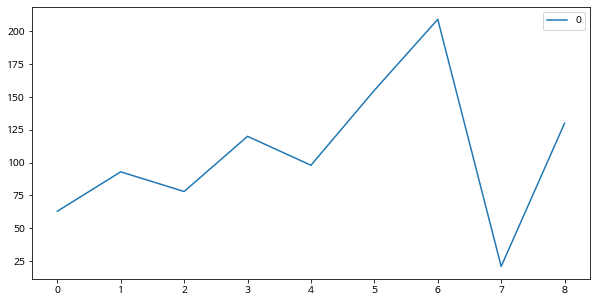

In [ ]:
chapter_keys = [63, 93, 78, 120, 98, 155, 209, 21, 130]
df_c = pd.DataFrame(chapter_keys)

plt.rcParams['figure.figsize'] = [10, 5]
df_c.plot(kind='line')

조금 소모적이긴 하지만, 일일이 값을 입력해서 데이타 프레임을 만들었다. 새로 만든 데이터 프레임을 통해 꺾은 선 그래프를 만들었다. 차트 모양을 보면 **7장까지 점점 고조**되어 가다가 **8장에서 크게 출현 빈도가 떨어진** **모습**을 확인할 수 있다.

In [ ]:
df[(df['Chapter'] == 8)]['nouns'].value_counts()

인간     20
변화     11
우리      9
자신      9
음       9
       ..
참여      1
다른      1
뿐더러     1
복       1
껏       1
Name: nouns, Length: 471, dtype: int64

8장을 따로 분석해본 결과 8장에서는 **'인간'**이라는 단어가 가장 많이 사용되었다. 그런데 길이를 확인해본 결과 471로 다른 장에 비해서 현전히 적어보였다. 

In [ ]:
df[(df['Chapter'] == 7)]['nouns'].value_counts()

인간      128
종교       98
사회       93
우리       73
성격       70
       ... 
질의        1
출하        1
질병        1
다몬        1
고고학자      1
Name: nouns, Length: 2826, dtype: int64

8장과 달리 7장의 경우 길이가 2826이다. 7장의 경우 **'인간'**이 전체에서 차지하는 비중은 약 4%이고 8장에서 **'인간'**이 전체에서 차지하는 비중 역시 4%에 가까웠다. 즉 단순히 등장 횟수만을 비교할 경우 중요도를 파악하기 어려웠다. 정확한 분석을 위해선 각 장의 전체 단어 개수 대비 핵심 키워드의 비중을 찾아야 한다.

In [ ]:
df[(df['Chapter'] == 1)]['nouns'].value_counts()

소유    59
나     51
존재    32
인간    26
꽃     22
      ..
권      1
진환     1
비중     1
비어     1
구체     1
Name: nouns, Length: 1111, dtype: int64

1장에서 가장 많이 등장한 단어는 **소유**였다. 소유는 1장에서 약 5%의 비중을 차지하고 있다. 다음으로 많은 비중을 차지하는 단어는 '나'이다. '나'는 앞에서 선정했던 전체 핵심 키워드 4가지에 포함되지 않는다. 즉 '나'는 1장에서 **특수하게 중요시하고 있는 워딩**이다. '나'가 1장 전체에서 차지하고 있는 비중은 소유와 유사하다.

In [ ]:
df[(df['Chapter'] == 2)]['nouns'].value_counts()

권위    46
소유    43
사랑    42
사람    38
존재    37
      ..
은폐     1
다해     1
첫      1
제거     1
장면     1
Name: nouns, Length: 1681, dtype: int64

2장에서 가장 많이 등장한 단어는 **'권위'**였다. 권위는 앞에서 선정했던 전체 핵심 키워드에 포함되지 않는다. 즉 권위는 2장에서 특수하게 중요시하고 있는 키워드라고 볼 수 있겠다. 권위는 2장에서 약 3%의 비중을 차지하고 있다. 소유 역시 유사한 비중을 차지하고 있다. 3번째로는 사랑, 4번째로는 사람, 5번째로는 존재가 비슷한 비중으로 등장하고 있다. 

In [ ]:
df[(df['Chapter'] == 3)]['nouns'].value_counts()

소유       42
에크하르트    40
인간       38
우리       32
사람       26
         ..
점옵        1
예행        1
아주        1
소수민족      1
항         1
Name: nouns, Length: 1600, dtype: int64

3장에서는 **소유**가 가장 많이 등장했다. 소유가 3장 전체에서 차지하는 비중은 약 2.6%이다. 인간, 우리 역시 비슷한 비중을 차지하고 있다. 다만 2장의 경우 에크하르트가 많이 언급 됐음을 분석을 통해 알 수 있었다. 즉 3장은 에크하르트를 중심으로 내용을 전개하고 있을 것이다.

In [ ]:
df[(df['Chapter'] == 4)]['nouns'].value_counts()

소유      91
우리      44
나       40
사회      34
인간      24
        ..
선사시대     1
종속       1
증오       1
사적       1
이욤       1
Name: nouns, Length: 1559, dtype: int64

4장에서는 '**소유'**가 압도적으로 많이 등장했다. 전체에서 차지하는 비중은 약 5.8%로 압도적이다. 그외에도 우리, 나, 사회가 많이 등장했다. 이 시점에서 한가지 알게된 흥미로운 사실은 **'우리' 혹은 '사회'가 많이 등장하면 '존재'가 적게 등장하고 '존재'가 등장할 경우 반대로 전자가 적게 등장한다는 점**이다. 연구자의 가설이 맞다면 흄은 존재, 우리, 사회를 동일시하고 있을 가능성이 있다. 그리고 앞에서 짧게 언급했던 것처럼 우리, 사회는 '공동체'와 연관이 있을 가능성이 있을 가능성이 크다. **만약 존재와 공동체의 유사도가 높다면, 가설의 타당성을 더 올라갈 것**이다.

In [ ]:
df[(df['Chapter'] == 5)]['nouns'].value_counts()

우리    74
인간    64
사회    36
나     31
자신    28
      ..
시신     1
차변     1
상생     1
허용     1
남녀     1
Name: nouns, Length: 1727, dtype: int64

5장에서는 '**우리**'가 압도적으로 많이 등장하고 있다. 5장도 마찬가지로 '존재'가 등장하지 않고 있다. '우리'가 5장에서 차지하는 비중은 약 4.2%이다. 또한, 5장에는 인간 역시 높은 비중으로 등장하고 있다.

In [ ]:
df[(df['Chapter'] == 6)]['nouns'].value_counts()

소유     92
우리     67
인간     49
존재     37
두려움    32
       ..
생리      1
신학자     1
한편      1
확인      1
별       1
Name: nouns, Length: 1939, dtype: int64

6장에서 가장 많이 등장한 단어는 '**소유**'이다. 소유는 6장 전체에서 약 4.7% 정도의 비중을 차지하고 있다. 다음으로 '우리' 역시 많이 등장한다. 한가지 예외적인 사실은 우리와 존재가 함께 등장하고 있다는 점이다. 다만 이 경우에 **'사회'는 높은 비중으로 등장하지 않았다**. 

In [ ]:
df[(df['Chapter'] == 9)]['nouns'].value_counts()

사회     78
인간     49
우리     49
관료     45
사람     40
       ..
황폐      1
예술      1
선백      1
입후보     1
우유      1
Name: nouns, Length: 2366, dtype: int64

9장에서 프롬은 **'사회'**를 가장 많이 언급하고 있다. 사회는 9장 전체에서 약 3%의 비중을 차지하고 있다. 결국 프롬이 소유냐 존재냐에서 **결론적으로 언급하고 싶었던 개념이 '사회'**인 것이다. 심지어 프롬은 7장 다음으로 9장에 가장 많은 워딩을 배치하고 있다. 

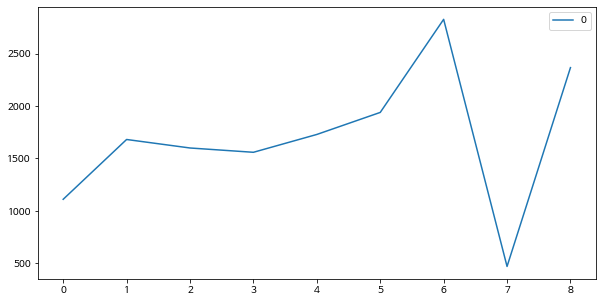

In [ ]:
chapter_wording = [1111, 1681, 1600, 1559, 1729, 1939, 2826, 471, 2366]
df_w = pd.DataFrame(chapter_wording)

plt.rcParams['figure.figsize'] = [10, 5]
df_w.plot(kind='line')

장별 전체 워딩의 개수를 비교해본 결과 차트 모양이 핵심 키워드의 출현 빈도와 얼추 일치함을 알 수 있다. 즉 프롬은 **자신이 중요하다고 생각하는 챕터에 많은 워딩을 넣고** 마찬가지로 **중요한 챕터에 핵심 키워드를 높은 비중으로 구성** 하고 있다. 그리고 차트 모양을 보면 프롬의 글쓰기 구성 방식은 **뒤로 갈수록 고도** 되다가 **결론 직전에 다른 주제를 환기**하는 스타일로 추측된다.

마지막으로 점검해야할 사안이 세 가지 남았다.


1.   '공동체'라는 단어가 '우리', '사회'와 관련이 있을 것인가?
2.   '존재'는 '우리', '사회'와 유사한 개념으로 사용되고 있는가?
3.    섹션별로 데이터베이스를 나눌 경우 유의미한 패턴 분석이 가능할까?



In [ ]:
for i in range(1, 10):
  print(df[(df['Chapter'] == i) & (df['nouns'] == '공동체')]['nouns'].value_counts())

Series([], Name: nouns, dtype: int64)
Series([], Name: nouns, dtype: int64)
공동체    5
Name: nouns, dtype: int64
Series([], Name: nouns, dtype: int64)
공동체    2
Name: nouns, dtype: int64
Series([], Name: nouns, dtype: int64)
공동체    3
Name: nouns, dtype: int64
Series([], Name: nouns, dtype: int64)
공동체    4
Name: nouns, dtype: int64


공동체라는 단어가 등장한 장은 **3장, 5장, 7장, 9장**이다. 각 장에서 핵심 단어는 다음과 같았다.  

1.   소유, 에크하르트 (3장) - 공동체 5번 등장
2.   우리, 인간, 사회 (5장) - 공동체 2번 등장
3.   인간, 종교, 사회 (7장) - 공동체 3번 등장
4.   사회, 인간, 우리 (9장) - 공동체 4번 등장

특이한 점은 3장에서 공동체가 가장 많이 등장하고 있다는 점이다. 즉 프롬은 3장에서 **에크하르트를 언급하며 종교와 공동체를 연결**하고 있다고 추측할 수 있다. 종교에 관한 언급은 7장에서도 많이 등장하고 있다. 5장, 7장, 9장은 모두 '인간', '우리', '사회' 등 공동체와 연관된 핵심 키워드들이 등장하고 있다. 즉 프롬은 **홀수 챕터에서 공동체, 사회와 관련된 주제를 서술**하고 있다.



그러나 기존의 가설과 달리 '존재'가 많이 등장했던 1장과 6장에서는 '공동체'라는 키워드를 발견할 수 없었다. 

In [ ]:
for i in range(1, 10):
  print(df[(df['Chapter'] == i) & (df['nouns'] == '존재')]['nouns'].value_counts())

존재    32
Name: nouns, dtype: int64
존재    37
Name: nouns, dtype: int64
존재    22
Name: nouns, dtype: int64
존재    13
Name: nouns, dtype: int64
존재    28
Name: nouns, dtype: int64
존재    37
Name: nouns, dtype: int64
존재    11
Name: nouns, dtype: int64
존재    5
Name: nouns, dtype: int64
존재    13
Name: nouns, dtype: int64


존재가 많이 등장한 장의 순위는 다음과 같다. 


1.   2장 = 6장 (37번)
2.   1장 (32번)



In [ ]:
print(df_s[df_s['keyword'] == '우리']['secondkey'].value_counts())
print(df_s[df_s['keyword'] == '인간']['secondkey'].value_counts())

x     223
소유     29
Name: secondkey, dtype: int64
x     276
우리     26
Name: secondkey, dtype: int64


새로운 가설로 '존재', '우리', '사회'의 연관성을 증명하기로 했다.이전에 데이터프레임의 secondkey를 저장 했다. 만약 우리, 사회의 secondkey가 '존재'가 포함된 문장에서도 함께 사용된다면, 개념들의 연관성을 입증할 수 있을 것이다. 당연한 결과지만, 가장 관련있는 키워드는 **'소유', '인간'**이었다. 

In [ ]:
df_s['keyword'] = 'x' #키워드 값 다시 x로 초기화
contains_be = df_s['sentences'].str.contains('존재') #문장에서 '존재'를 포함하는 경우

keyword_is_x = df_s['keyword'] == 'x' #키워드의 값이 'x'일 경우

df_s.loc[(keyword_is_x) & (contains_be), 'keyword'] = '존재' #존재를 포함하면 keyword를 존재로 표시

In [ ]:
df_s['secondkey'] = 'x' #secondkey를 x로 초기화
keyword_be = df_s['keyword'].str.contains('존재') #keyword가 '존재'일 경우

keyword_x = df_s['keyword'] != 'x'

#키워드가 존재인 것들중 소유, 인간도 포함한 문장 필터링
df_s.loc[(keyword_x) & (keyword_be) & (contains_we), 'secondkey'] = '우리' #키워드가 '존재'인 것 중 문장에 '우리'를 포함한 문장
df_s.loc[(keyword_be) & (contains_have), 'secondkey'] = '소유' #키워드가 '존재'인 것 중 문장에 '소유'를 포함한 문장

In [ ]:
df_s[(df_s['secondkey'] == '소유') | (df_s['secondkey'] == '우리')]['secondkey'].value_counts()

소유    69
우리    13
Name: secondkey, dtype: int64

가설대로 '존재'는 **'소유'와 높은 연관성**을 보였고 **'우리'와도 연관성**을 보였다. 즉 **우리, 사회는 '공동체'와 연관이 있고** '존재'는 공동체와 직접적인 ,연관성을 보이진 않았지만, 존재는 **우리, 사회와 분명히 연관있는 단어**라고 볼 수 있다.

마지막으로 섹션을 나누어서 패턴 분석을 시도하겠다.

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/2021-2 디지털기반철학큐레이팅/data/havebe/chap1sections.txt", "r") as f:
  chap1_sections = [line.strip() for line in f]

공유폴더에 저장되어 있던 section 데이터를 활용했다.



In [ ]:
chap1_sections

['소유와 존재의 차이의 중요성 일반적인 상식으로는 소유나 존재냐의 양자백인이 있음 수 없다. 우리의 눈에는 소유한다는 것이 삶에 포함된 극히 정상적인 행위이다.살기 위해서 우리는 시몽운· 당연히 소유한다. 그뿐이뱌 사-뭉음 줍기기 위해서도 그것을 소유하지 않으면 안 된다, 소유하는 것을, 점 접더 많이 소유하는 것운 지상목표로 하는 사회, 그리고 사람에 대해서도 "백만 답러의 가치가 있다·고 맙하는 사회 속에서 소유하는 것과존재하는 것 사이에 어찌 양자백인이 있·유 수 있겠는가? 오히 려 존재의 본전이 바로 소유하는 것에 있어서. 아무것도 소유하지 못한 사람은 아무것도 아닌 존재로 여겨지는 실정이다.그러나 일찍이 인생의 위대한 스승듈은 소유와 촌재의 양자택일에서 그들의 철학적 관점의 핵심움 찾아냈다. 석가모니는 인간으로서자기 도야의 최고 단계에 이르려는 사람은 재-뚱웅 답해서는 안 된다고 설법한다. 또한 예수는 ·누구든지 재 목숨옵 구원코자 하면 잃을것이요 누구든지 냐릅 위히여 제 목숨十} 잃으면 구원하리라. 사람이만일 온 천히욥 얻고도 자기를 잃든지 빼앗기든지 하면 무엇이 유익33 하리오’’(＂누가 복음” 9:24-25)라고 밉한다. 수사(修+) 에크하르트는 아무것도 소유하지 않고 자신윤 열어서 “비우눈? 것”, 자아에 의해서 방해받지 않는 것이 영적(策的) 부(富)와 힘윤 얻는 전재라고 가르친다. 또한 마르크스논 사치야말로 빈곤과 마찬가지로 큰 악덕이며, 우리는 많이 소유하는 것이 아니라 풍요몹게 존재하는 것웅 목표로 해야 한다고 가르친다(내가 여기에서 언급하는 마르크스는 철저한 휴머니스트로서의 진짜 마르크스이며. 소련 공산주의에 의해서선천된, 변조된 다른 종류의 마로크스가 아니다).이처럼 소유와 존재룝 구분하는 문제는 몇 년 전부터 나의 머리물떠나지 않았다. 나는 정신분석학적 방법을 빌려서 개인이나 집단을구체적인 고참 대상으로 삼음으로써 두 실존양식의 차이륜 이루는경험적 토대륜 찾아보고자 했다. 냐의 고찰이 이끌어낸 명백한 결론온 이 차이는 생명에의 애

In [ ]:
df_chap = pd.DataFrame(chap1_sections, columns=['sections'])

In [ ]:
df_chap

,sections
0,소유와 존재의 차이의 중요성 일반적인 상식으로는 소유나 존재냐의 양자백인이 있음 수...
1,"문학에 나타난 예 소유적 실존양식과 존재적 실존양식의 차이블 쉽게 이해하기 위해서,..."
2,언어관습의 변화 존재와 소유 가운데 어느 편에 더 비중윤 두는가 하는 일반적 추이현...
3,뒤 마레와 마르크스의 고찰 이러한 언어관습이 초래한 부정적 결과는 이미 18세기에 ...
4,오늘날의 언어관용 뒤 UklI가 살았던 이후 200년 동안 동사륭 명사로 대치시키는...
5,"두 개념의 어원 ” 가지디{have, haben)”라는 말은 착각하기 수]운 단순한..."
6,"존재에 대한 철학적 개념들 존재는 과거 수천 권 첩학서의 주제였고 ""존재란 무엇인가..."
7,소유와소비 두 십촌양식의 차이윤 명시해주는 몇 가지 간단한 시례욥 접하기 선에. 소...


In [ ]:
df_chap['iskeyword'] = 'x' #chap1의 iskeyword 컬럼을 'x'로 초기화

for i in range(len(df_chap)): #1장의 핵심인 소유, 나, 존재, 인간을 포함한 경우를 count해서 is keyword에 저장
  sum = 0
  sum += df_chap['sections'][i].count('소유')
  sum += df_chap['sections'][i].count('나')
  sum += df_chap['sections'][i].count('존재')
  sum += df_chap['sections'][i].count('인간')
  df_chap['iskeyword'][i] = sum

In [ ]:
df_chap

,sections,iskeyowrd,iskeyword
0,소유와 존재의 차이의 중요성 일반적인 상식으로는 소유나 존재냐의 양자백인이 있음 수...,x,32
1,"문학에 나타난 예 소유적 실존양식과 존재적 실존양식의 차이블 쉽게 이해하기 위해서,...",x,47
2,언어관습의 변화 존재와 소유 가운데 어느 편에 더 비중윤 두는가 하는 일반적 추이현...,x,17
3,뒤 마레와 마르크스의 고찰 이러한 언어관습이 초래한 부정적 결과는 이미 18세기에 ...,x,25
4,오늘날의 언어관용 뒤 UklI가 살았던 이후 200년 동안 동사륭 명사로 대치시키는...,x,22
5,"두 개념의 어원 ” 가지디{have, haben)”라는 말은 착각하기 수]운 단순한...",x,46
6,"존재에 대한 철학적 개념들 존재는 과거 수천 권 첩학서의 주제였고 ""존재란 무엇인가...",x,12
7,소유와소비 두 십촌양식의 차이윤 명시해주는 몇 가지 간단한 시례욥 접하기 선에. 소...,x,25


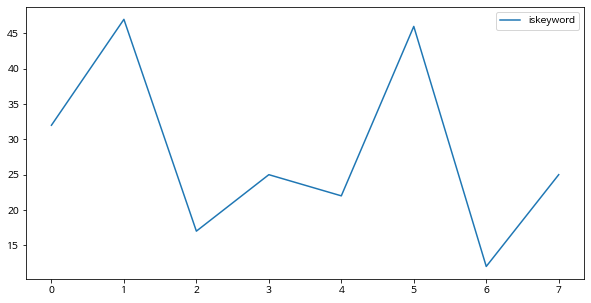

In [ ]:
df_chap.plot(kind = 'line', y = 'iskeyword')

1장에서는 **2번째 섹션과 6번째 섹션**에서 키워드가 많이 등장했다.

같은 방식으로 2장부터 9장까지 분석해보기로 했다.

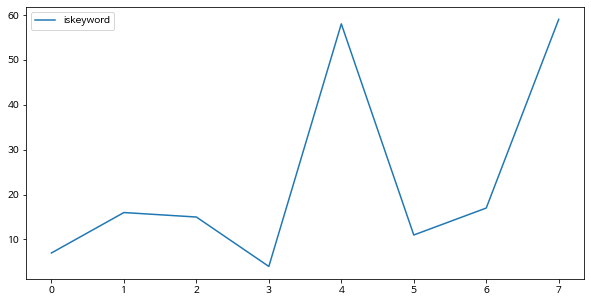

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/2021-2 디지털기반철학큐레이팅/data/havebe/chap2sections.txt", "r") as f:
  chap2_sections = [line.strip() for line in f]

df_chap = pd.DataFrame(chap2_sections, columns=['sections'])

df_chap['iskeyword'] = 'x'

for i in range(len(df_chap)): #2장의 핵심인 권위, 소유, 사랑, 사람을 포함한 경우를 count해서 iskeyword에 저장
  sum = 0
  sum += df_chap['sections'][i].count('권위')
  sum += df_chap['sections'][i].count('소유')
  sum += df_chap['sections'][i].count('사랑')
  sum += df_chap['sections'][i].count('사람')
  df_chap['iskeyword'][i] = sum

df_chap.plot(kind = 'line', y = 'iskeyword')

2장에서는** 5번째 섹션**과 **8번째 섹션**에서 키워드가 많이 등장했다.

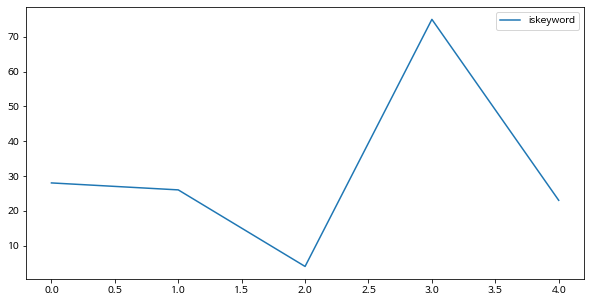

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/2021-2 디지털기반철학큐레이팅/data/havebe/chap3sections.txt", "r") as f:
  chap3_sections = [line.strip() for line in f]

df_chap = pd.DataFrame(chap3_sections, columns=['sections'])

df_chap['iskeyword'] = 'x'

for i in range(len(df_chap)): #3장의 핵심인 소유, 에크하르트, 인간, 우리를 포함한 경우를 count해서 iskeyword에 저장
  sum = 0
  sum += df_chap['sections'][i].count('소유')
  sum += df_chap['sections'][i].count('에크하르트')
  sum += df_chap['sections'][i].count('인간')
  sum += df_chap['sections'][i].count('우리')
  df_chap['iskeyword'][i] = sum

df_chap.plot(kind = 'line', y = 'iskeyword')

3장은 섹션이 5개 뿐이다. 키워드는 장의 키워드는** 4번째 섹션**에서 가장 많이 등장했다.

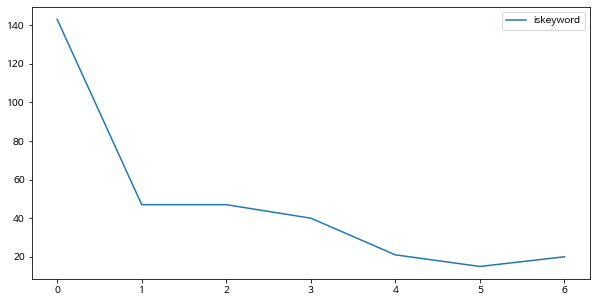

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/2021-2 디지털기반철학큐레이팅/data/havebe/chap4sections.txt", "r") as f:
  chap4_sections = [line.strip() for line in f]

df_chap = pd.DataFrame(chap4_sections, columns=['sections'])

df_chap['iskeyword'] = 'x'

for i in range(len(df_chap)): #4장의 핵심인 소유, 우리, 나, 사회를 포함한 경우를 count해서 iskeyword에 저장
  sum = 0
  sum += df_chap['sections'][i].count('소유')
  sum += df_chap['sections'][i].count('우리')
  sum += df_chap['sections'][i].count('나')
  sum += df_chap['sections'][i].count('사회')
  df_chap['iskeyword'][i] = sum

df_chap.plot(kind = 'line', y = 'iskeyword')

4장은 조금 신기한 결과가 나왔다. 4장은 **첫번째 섹션**에서 압도적으로 키워드가 많이 등장했다.:

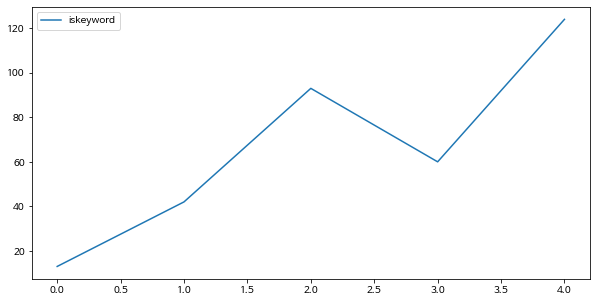

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/2021-2 디지털기반철학큐레이팅/data/havebe/chap5sections.txt", "r") as f:
  chap5_sections = [line.strip() for line in f]

df_chap = pd.DataFrame(chap5_sections, columns=['sections'])

df_chap['iskeyword'] = 'x'

for i in range(len(df_chap)): #5장의 핵심인 우리, 인간, 사회, 나를 포함한 경우를 count해서 iskeyword에 저장
  sum = 0
  sum += df_chap['sections'][i].count('우리')
  sum += df_chap['sections'][i].count('인간')
  sum += df_chap['sections'][i].count('사회')
  sum += df_chap['sections'][i].count('나')
  df_chap['iskeyword'][i] = sum

df_chap.plot(kind = 'line', y = 'iskeyword')

5장의 섹션은 5개다.** 3번째 섹션과 5번째 섹션**에서 가장 많은 키워드가 등장했다. 

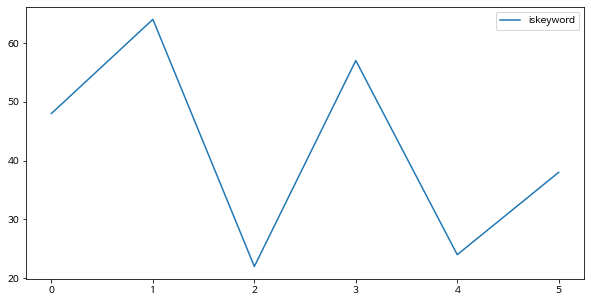

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/2021-2 디지털기반철학큐레이팅/data/havebe/chap6sections.txt", "r") as f:
  chap6_sections = [line.strip() for line in f]

df_chap = pd.DataFrame(chap6_sections, columns=['sections'])

df_chap['iskeyword'] = 'x'

for i in range(len(df_chap)): #6장의 핵심인 소유, 인간, 우리, 존재를 포함한 경우를 count해서 iskeyword에 저장
  sum = 0
  sum += df_chap['sections'][i].count('소유')
  sum += df_chap['sections'][i].count('인간')
  sum += df_chap['sections'][i].count('우리')
  sum += df_chap['sections'][i].count('존재')
  df_chap['iskeyword'][i] = sum

df_chap.plot(kind = 'line', y = 'iskeyword')

6장의 섹션은 총 6개다. 6장에서는 **2번째 섹션과 4번째 섹션**에서 가장 많은 키워드가 등장했다. 여기까지 분석하고 알아낸 사실은  프롬은 **섹션 구성을 할 때도 마지막 섹션 이전에 키워드를 적게 등장시킨다**. 9장 직전에 8장에서 딴소리를 했던 구성 방식과 유사하다. 일종의 프랙탈이 관찰되고 있다.

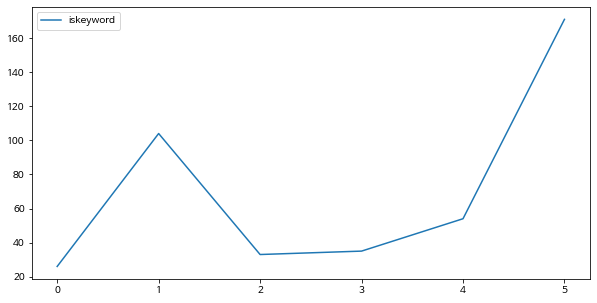

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/2021-2 디지털기반철학큐레이팅/data/havebe/chap7sections.txt", "r") as f:
  chap7_sections = [line.strip() for line in f]

df_chap = pd.DataFrame(chap7_sections, columns=['sections'])

df_chap['iskeyword'] = 'x'

for i in range(len(df_chap)): #7장의 핵심인 인간, 종교, 사회, 우리를 포함한 경우를 count해서 iskeyword에 저장
  sum = 0
  sum += df_chap['sections'][i].count('인간')
  sum += df_chap['sections'][i].count('종교')
  sum += df_chap['sections'][i].count('사회')
  sum += df_chap['sections'][i].count('우리')
  df_chap['iskeyword'][i] = sum

df_chap.plot(kind = 'line', y = 'iskeyword')

7장의 총 섹션 개수는 6개다. 7장은 **2번째 섹션과 마지막 섹션**에서 키워드가 많이 등장했다. 

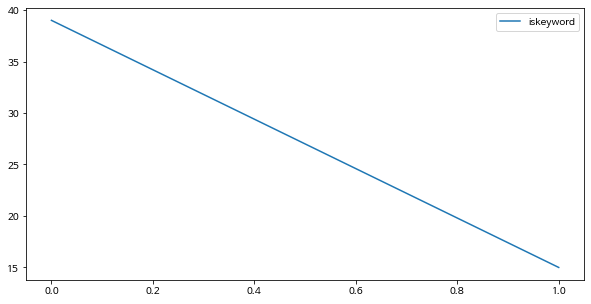

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/2021-2 디지털기반철학큐레이팅/data/havebe/chap8sections.txt", "r") as f:
  chap8_sections = [line.strip() for line in f]

df_chap = pd.DataFrame(chap8_sections, columns=['sections'])

df_chap['iskeyword'] = 'x'

for i in range(len(df_chap)): #8장의 핵심인 인간, 변화, 우리, 자신을 포함한 경우를 count해서 iskeyword에 저장
  sum = 0
  sum += df_chap['sections'][i].count('인간')
  sum += df_chap['sections'][i].count('변화')
  sum += df_chap['sections'][i].count('우리')
  sum += df_chap['sections'][i].count('자신')
  df_chap['iskeyword'][i] = sum

df_chap.plot(kind = 'line', y = 'iskeyword')

8장은 섹션이 2개 뿐이다. **첫번째 섹션**에서 두번째 섹션보다 키워드가 많이 등장했다.

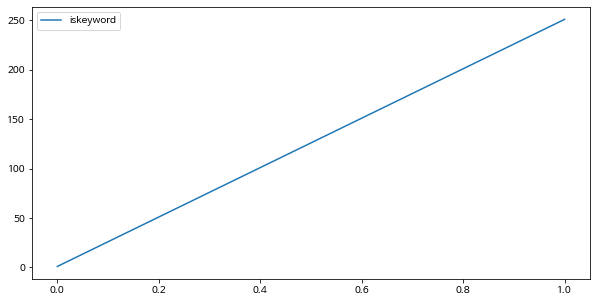

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/2021-2 디지털기반철학큐레이팅/data/havebe/chap9sections.txt", "r") as f:
  chap9_sections = [line.strip() for line in f]

df_chap = pd.DataFrame(chap9_sections, columns=['sections'])

df_chap['iskeyword'] = 'x'

for i in range(len(df_chap)): #9장의 핵심인 사회, 인간, 우리, 관료를 포함한 경우를 count해서 iskeyword에 저장
  sum = 0
  sum += df_chap['sections'][i].count('사회')
  sum += df_chap['sections'][i].count('인간')
  sum += df_chap['sections'][i].count('우리')
  sum += df_chap['sections'][i].count('관료')
  df_chap['iskeyword'][i] = sum

df_chap.plot(kind = 'line', y = 'iskeyword')

9장도 섹션이 두개뿐이라 유의미한 분석이 불가능했다. 9장은 8장과 반대로 **2번째 섹션**에서 더 많은 키워드가 등장했다.

섹션 분석을 통해서 알게된 사실은 다음과 같다. 



1.   프롬은 각 장마다 키워드 분배 방식을 다르게 구성하고 있다.
      1. 초반에 많이 분배하는 방식 = 1장, 4장, 6장, 8장
      2. 중반에 많이 분배하는 방식 = 3장, 5장, 6장
      3. 후반에 많이 분배하는 방식 = 2장, 3장, 5장, 7장, 9장
2.   흥미로운점은 **공동체와 연관이 있었던 3장, 5장, 7장, 9**장 모두 후반부 섹션에 키워드 비중이 높다는 점이다.
3.   또 다른 점은 분석과정에서 명시했듯이 챕터와 마찬가지로 **섹션에서도 최종 섹션 직전에 키워드 비중이 줄어드는 현상**을 볼 수 있었다.
4.   섹션 키워드 분석을 통해 각 장의 핵심적인 섹션을 쉽게 파악할 수 있다. 그 결과 **데이터를 참고하여 각 장의 핵심 위주로 글을 빠르게 속독할 수 있다**.

결론



1.   (프롬의 저술방식) 프롬은 전체적으로 **중반이나 후반부**에 핵심적인 내용을 서술하고 있다. 또한, 프롬은 글의 **후반부 직전에 분량을 줄이고 전체 맥락과 다른 소리를 하는 내용을 구성**하고 있다.
2.   (키워드 간의 연관성) 『소유냐 존재냐』의 핵심 키워드는** '인간', '우리', '소유', '사회'**이다. '우리', '인간', '사회'는 **공동체**와 연관이 있는 키워드다. 흥미로운 점은 '우리', '인간', '사회'가 많이 등장하지 않은 장에서 **'존재'**를 많이 언급하고 있다. 본 연구자는 분석과정에서 **앞에 3 키워드를 '존재'가 다른 장에서 대체하고 있을 가능성**을 가설로서 제시했다. 그러나 앞에 3 키워드와 달리 **'존재'는 '공동체'와 직접적인 연관성이 보이지 않았다**. 다만 존재는 '우리', '사회'와 마찬가지로 **'소유', '인간'과 높은 연관도**를 보였다. 즉 본 텍스트에서 **'존재'는 '소유', '인간'과 비슷한 정도의 중요도와 의미를 공유하고 있을 것**으로 추측된다. 
3.   (저술의 의도 분석) 본 텍스트에서 가장 높은 분량이 배분된 챕터는 7장이다. 7장에서 프롬은 **'인간', '종교', '사회', '우리'**를 키워드로 제시하고 있다. 프롬은 3장에서도 언급했던 '종교'와 관련된 내용과 '인간'의 문제를 결합해서 소유와 존재를 대조시키고 있다. '존재'와 마찬가지로 프롬은 공동체와 높은 연관도를 보이는 '우리', '인간', '사회'를 강조하고 있다. 따라서 데이터에 기반할 때 프롬은 '소유' 중심의 문제에서 **'존재', '공동체', '인간' 중심의 문제로 전환을 의식의 전환을 촉구**하고 있다고 추측할 수 있다. 

